In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import glob

(48, 48, 3)


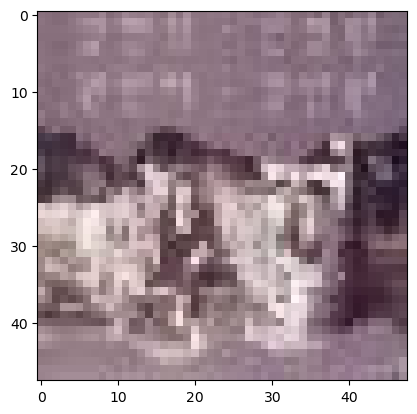

In [58]:
# 이미지 기본 정보 확인
# PIL.Image.open() -> numpy 변환 시 : RGB 순이다
img = Image.open('album/album_1990_4.jpg')
plt.imshow(img)
img = np.array(img)
print(img.shape)

In [20]:
# 앨범 이미지를 불러와서 시대별로 나누기
# 1990년대 : 0
# 2000년대 : 1
# 2010년대 : 2

# 일부 이미지 3채널이 아니라 1채널(GrayScale)임
# 우선
filepath = './imgAumg_total/'
imgList = glob.glob(filepath+"*")
yearLabel = {'9': 0,
             '0': 1,
             '1': 2}

imgdata = []
eraLabel = []

for path_ in imgList:
    img = Image.open(path_)

    # RGB 일 때
    img = np.array(img).reshape(-1)
    if len(img) == 6912:
        imgdata.append(img)

        era = path_.split('/')[-1].split('_')[1][2]
        eraLabel.append(yearLabel[era])

    # # gray scale 일 때 사용
    # img = img.convert('L')
    # img = np.array(img).reshape(-1)
    # if len(img) == 2304:
    #     imgdata.append(img)
    #     era = path_.split('/')[-1].split('_')[1][2]
    #     eraLabel.append(yearLabel[era])


imgdata = np.array(imgdata)
eraLabel = np.array(eraLabel)

In [21]:
imgdata.shape,eraLabel.shape

((17620, 6912), (17620,))

In [22]:
imgDF = pd.DataFrame(imgdata)
imgDF['era'] = eraLabel.tolist()

# 시대별 RGB 픽셀 평균 값 정도
grouped = imgDF.groupby(by='era').agg('mean')

In [23]:
red = grouped.iloc[:,:2304].T.mean()
green = grouped.iloc[:,2304:4608].T.mean()
blue = grouped.iloc[:,4608:].T.mean()

In [24]:
rgbMean = pd.concat((red,green,blue),axis=1)
rgbMean.columns = ['red', 'green', 'blue']
rgbMean.index = ['1990대','2000대','2010대']
rgbMean

,red,green,blue
1990대,132.058535,127.467383,127.441568
2000대,127.767774,120.991748,123.079846
2010대,134.128281,130.345843,128.879622


<Figure size 1500x1500 with 0 Axes>

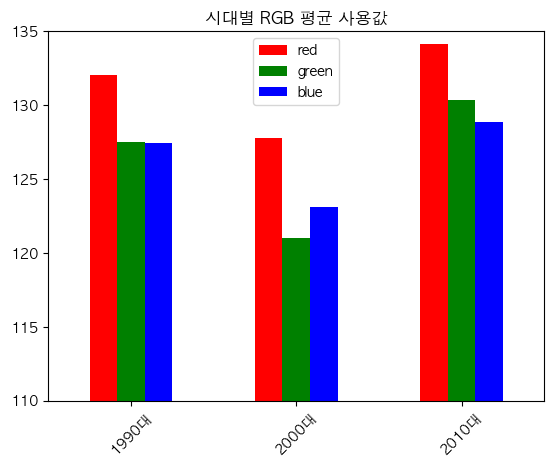

In [26]:
plt.rcParams["font.family"] = "AppleGothic"
plt.figure(figsize=(15,15))
rgbMean.plot(kind='bar',color=['red','green','blue'])
plt.ylim((110,135))
plt.xticks(rotation=45)
plt.title('시대별 RGB 평균 사용값')
plt.savefig('././image/total_aug_average_RGB.jpg')

In [27]:
# 시대별 픽셀 위치에 따른 값 차이
grouped1 = imgDF.groupby(by='era').agg('mean').T
grouped1

era,0,1,2
0,159.318789,168.099357,146.518405
1,152.468172,162.086493,138.870314
2,147.793292,158.849865,136.524540
3,157.686003,165.847833,147.509714
4,150.400411,159.617806,139.348841
...,...,...,...
6907,147.232717,155.514218,134.052658
6908,142.091205,152.135240,131.132754
6909,157.696954,165.282668,143.931663
6910,150.222279,158.454469,133.548909


In [28]:
nine = np.array(grouped1[0]).reshape((48,48,3))
zero = np.array(grouped1[1]).reshape((48,48,3))
ten = np.array(grouped1[2]).reshape((48,48,3))

/var/folders/w2/wbd1l3bj5bb3w8lh26vb0k580000gn/T/ipykernel_15428/213847629.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 700x2000 with 0 Axes>

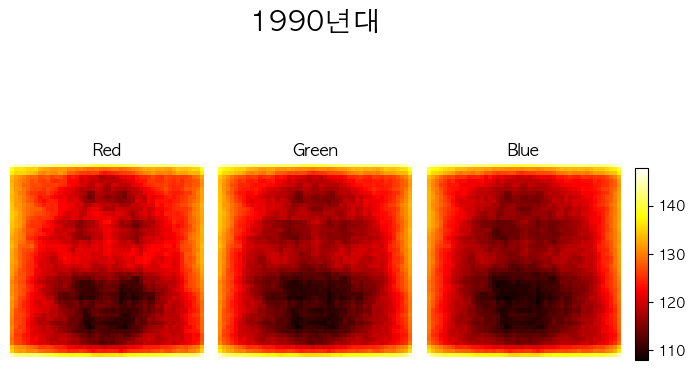

/var/folders/w2/wbd1l3bj5bb3w8lh26vb0k580000gn/T/ipykernel_15428/213847629.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 700x2000 with 0 Axes>

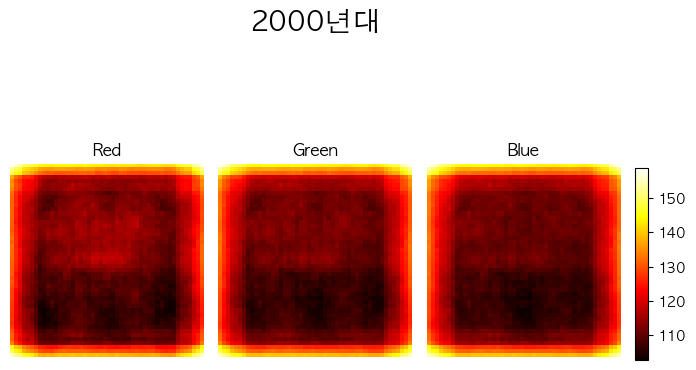

/var/folders/w2/wbd1l3bj5bb3w8lh26vb0k580000gn/T/ipykernel_15428/213847629.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 700x2000 with 0 Axes>

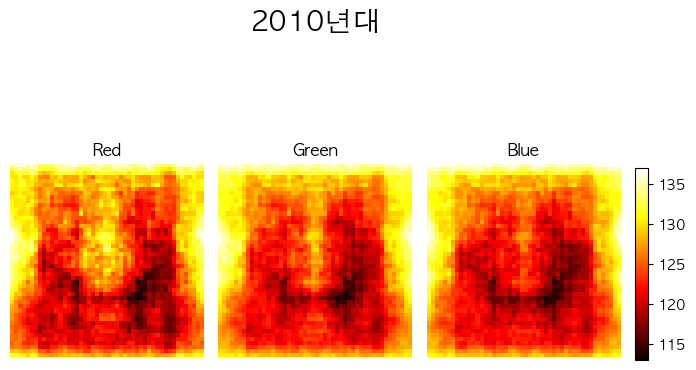

In [29]:
import matplotlib.pyplot as plt

# 데이터 (예시)
eraRGB = [nine, zero, ten]
eraName = ['1990년대', '2000년대', '2010년대']
color = ['Red', 'Green', 'Blue']

for i in range(len(eraRGB)):
    plt.figure(figsize=(7, 20))
    fig, axes = plt.subplots(1, 3)

    for ch in range(3):
        axes[ch].imshow(eraRGB[i][:, :, ch], cmap='hot')
        axes[ch].set_title(f'{color[ch]}')
        axes[ch].axis('off')

    # 컬러바 추가
    cbar_ax = fig.add_axes([1, 0.25, 0.02, 0.4])  # 컬러바 위치 및 크기 조정
    cbar = fig.colorbar(axes[2].imshow(eraRGB[i][:, :, 2], cmap='hot'), cax=cbar_ax)

    plt.suptitle(f'{eraName[i]}', size=20)

    plt.tight_layout()
    plt.savefig(f'././image/total_aug_distribution_{eraName[i][:4]}.jpg')
    plt.show()